# The Video Game Industry

### In this notebook we will be using the Video Games data up to 2019 to answer some conterversal questions about the video game industry in the past decade

The dataset was downloaded from Kaggle: https://www.kaggle.com/ashaheedq/video-games-sales-2019

##### Here are some information about the fields in the data

- Rank - Ranking of overall sales
- Name - Name of the game
- Platform - Platform of the game (i.e. PC, PS4, XOne, etc.)
- Genre - Genre of the game
- ESRB Rating - ESRB Rating of the game
- Publisher - Publisher of the game
- Developer - Developer of the game
- Critic Score - Critic score of the game from 10
- User Score - Users score the game from 10
- Total Shipped - Total shipped copies of the game
- Global_Sales - Total worldwide sales (in millions)
- NA_Sales - Sales in North America (in millions)
- PAL_Sales - Sales in Europe (in millions)
- JP_Sales - Sales in Japan (in millions)
- Other_Sales - Sales in the rest of the world (in millions)
- Year - Year of release of the game

### ESRB Ratings Description:


- **Rating Pending (RP)**: This symbol is used in promotional materials for games which have not yet been assigned a final rating by the ESRB.


- **Everyone (E)**: Games with this rating contain content which the ESRB believes is generally suitable for all ages. They can contain content such as infrequent use of "mild"/cartoon violence, and mild language. This rating was created in 1998 to replace the Kids-to-Adults (K-A) rating. According to the ESRB, the company had wanted to use an "E" rating from the beginning, but another company had held a trademark on the use of an "E" icon.


- **Everyone 10+ (E10+)**: Games with this rating contain content which the ESRB believes is generally suitable for ages 10 and older. They can contain content such as a greater amount of violence, mild language, crude humor, or suggestive content than the Everyone (E) rating.


- **Teen (T)**: Games with this rating contain content which the ESRB believes is generally suitable for ages 13 and older. They can contain content higher in impact than the Everyone 10+ rating but not to the extent of the Mature (M) rating such as moderate amounts of violence (including small amounts of blood), infrequent use of strong language or suggestive themes, sexual content, brief nudity, and crude humor.


- **Mature (M)**: Games with this rating contain content which the ESRB believes is generally suitable for ages 17 and older. They can contain content such as intense and/or realistic portrayals of violence (including blood, gore, mutilation, and depictions of death), strong sexual themes and content, nudity, and more frequent use of strong language.


- **Adults Only 18+ (AO)**: Games with this rating contain content which the ESRB believes is only suitable for ages 18 and older. They contain content with an impact higher than the Mature (M) rating can accommodate, such as graphic sexual themes and content, extreme portrayals of violence, or unsimulated gambling with real currency. The majority of AO-rated titles are adult video games. The ESRB has only issued this rating to four titles for reasons other than sexual content; three titles with this rating are due to extreme levels of intense violence, and only one title received this rating because players can gamble using their actual money. This rating does not signify they are obscene or pornographic, but the content is only appropriate for adult players.


- **Early Childhood (EC) | 1994–2018**: Games with this rating contain content which is aimed towards a preschool audience. They do not contain content that parents would find objectionable to this audience. No longer used as of 2018 due to few titles using this, but previous releases may still show the rating.


- **Kids to Adults (K–A) | 1994–1998**: Games with this rating, as the title implies, appeals to children and adults. This rating was used from 1994 to 1998 before it was replaced with the Everyone (E) rating.

### The questions that we are trying to answer

- What kind of video games developers usually develop that are suitable for children?

- What are some of the emerging video games genres?

- Do diffirent companies produce games for diffirent target audeicnes?

In [45]:
# We will first start by importing all the libraries we need to use
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Read the CSV file and print a sample
df = pd.read_csv('vgsales-12-4-2019.csv')
df.head()

,Rank,Name,basename,Genre,ESRB_Rating,Platform,Publisher,Developer,VGChartz_Score,Critic_Score,...,NA_Sales,PAL_Sales,JP_Sales,Other_Sales,Year,Last_Update,url,status,Vgchartzscore,img_url
0,1,Wii Sports,wii-sports,Sports,E,Wii,Nintendo,Nintendo EAD,NaN,7.7,...,NaN,NaN,NaN,NaN,2006.0,NaN,http://www.vgchartz.com/game/2667/wii-sports/?...,1,NaN,/games/boxart/full_2258645AmericaFrontccc.jpg
1,2,Super Mario Bros.,super-mario-bros,Platform,NaN,NES,Nintendo,Nintendo EAD,NaN,10.0,...,NaN,NaN,NaN,NaN,1985.0,NaN,http://www.vgchartz.com/game/6455/super-mario-...,1,NaN,/games/boxart/8972270ccc.jpg
2,3,Mario Kart Wii,mario-kart-wii,Racing,E,Wii,Nintendo,Nintendo EAD,NaN,8.2,...,NaN,NaN,NaN,NaN,2008.0,11th Apr 18,http://www.vgchartz.com/game/6968/mario-kart-w...,1,8.7,/games/boxart/full_8932480AmericaFrontccc.jpg
3,4,PlayerUnknown's Battlegrounds,playerunknowns-battlegrounds,Shooter,NaN,PC,PUBG Corporation,PUBG Corporation,NaN,NaN,...,NaN,NaN,NaN,NaN,2017.0,13th Nov 18,http://www.vgchartz.com/game/215988/playerunkn...,1,NaN,/games/boxart/full_8052843AmericaFrontccc.jpg
4,5,Wii Sports Resort,wii-sports-resort,Sports,E,Wii,Nintendo,Nintendo EAD,NaN,8.0,...,NaN,NaN,NaN,NaN,2009.0,NaN,http://www.vgchartz.com/game/24656/wii-sports-...,1,8.8,/games/boxart/full_7295041AmericaFrontccc.jpg


##### The first step that I am going to take is to have a generic understanding of how the data is looking.

In [46]:
# How is the data looking?
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55792 entries, 0 to 55791
Data columns (total 23 columns):
Rank              55792 non-null int64
Name              55792 non-null object
basename          55792 non-null object
Genre             55792 non-null object
ESRB_Rating       23623 non-null object
Platform          55792 non-null object
Publisher         55792 non-null object
Developer         55775 non-null object
VGChartz_Score    0 non-null float64
Critic_Score      6536 non-null float64
User_Score        335 non-null float64
Total_Shipped     1827 non-null float64
Global_Sales      19415 non-null float64
NA_Sales          12964 non-null float64
PAL_Sales         13189 non-null float64
JP_Sales          7043 non-null float64
Other_Sales       15522 non-null float64
Year              54813 non-null float64
Last_Update       9186 non-null object
url               55792 non-null object
status            55792 non-null int64
Vgchartzscore     799 non-null float64
img_url       

In [47]:
# Does it have appropriate types?
df.dtypes

Rank                int64
Name               object
basename           object
Genre              object
ESRB_Rating        object
Platform           object
Publisher          object
Developer          object
VGChartz_Score    float64
Critic_Score      float64
User_Score        float64
Total_Shipped     float64
Global_Sales      float64
NA_Sales          float64
PAL_Sales         float64
JP_Sales          float64
Other_Sales       float64
Year              float64
Last_Update        object
url                object
status              int64
Vgchartzscore     float64
img_url            object
dtype: object

In [48]:
# Check how much missing data do we have in the columns
ratioMissing = df.isnull().sum() * 100 / len(df)
ratioMissing.sort_values(ascending=False, inplace=True)
ratioMissing

VGChartz_Score    100.000000
User_Score         99.399555
Vgchartzscore      98.567895
Total_Shipped      96.725337
Critic_Score       88.285059
JP_Sales           87.376326
Last_Update        83.535274
NA_Sales           76.763694
PAL_Sales          76.360410
Other_Sales        72.178807
Global_Sales       65.201104
ESRB_Rating        57.658804
Year                1.754732
Developer           0.030470
basename            0.000000
Name                0.000000
Genre               0.000000
img_url             0.000000
Platform            0.000000
Publisher           0.000000
url                 0.000000
status              0.000000
Rank                0.000000
dtype: float64

## It seems that the data needs some cleaning before we start working with it

In [49]:
# Could be useful to convert the Last_Update column to date
df['Last_Update'] = pd.to_datetime(df['Last_Update'])

In [50]:
# It seems that there is a duplicated column for the VG charts score as one of them has 100 missing values. 
# For the purpose of this analysis it is safe to drop this empty column
df.drop(columns=['VGChartz_Score'], inplace = True)

It seems that there are several columns that we won't be needing for this analysis. We will drop the irrelevant columns identified and save them in a new data frame named `df_main` to create a lighter copy for the wrangling process.

Let us take another look on the questions we are trying to answer:

- What kind of video games developers usually develop that is suitable for children?

- What are some of the emerging video games genres?

- What are the most popular video games genres?

It seems that the dataset holds alot of diffirent columns that include scoring of the games popularity from diffirent categories. The columns are `Rank`, `User_Score` , `Vgchartzscore` and `Critic_Score`. These columns could be useful. However, the ration of missing data in some of these columns is very large. With the exceptio of `Rank` al of the other columns have over **80%** missing values which could be problamatic in our analysis.

For that reason we decided to drop all of these columns and keep the `Rank` Column

In [51]:
# Copying a df_main copy that I will use for most of my wrangling process.
df_main = df

In [52]:
# Droping columns that we are most likely not going to use and has alot of missing data
df_main.drop(columns=['User_Score','Vgchartzscore','Critic_Score'], inplace=True)

This analysis does not have any specific geographical location. However, the columns that indicate video game sales are categorized into several regions. We will drop all the sales columns and keep the `Global_Sales` column since we are looking at these questions from a global perspective. Another reason of droping the sales columns is because regions such as `JP_Sales` has over **80%** missing data which could be problamatic if we attempted to perform any location-based insights.

In [53]:
# Other columns that has alot of missing data
df_main.drop(columns=['NA_Sales','PAL_Sales','JP_Sales','Other_Sales'], inplace=True)

We have one column here, `status`, that I do not know what it indicates, and it is not given in the description on the Kaggle page. This could be a scarped column that is designed for internal purposes for the source. However we will attempt to understand what it might indicate by looking at the values assigned to it.

In [54]:
# WHat is this column about? it seems to have the same value for all rows
df_main["status"].value_counts()

1    55792
Name: status, dtype: int64

It seems that all the values of status is `1`, this is not very helpful for us and as mentioned before it could have been assigned here for internal purposes. We will drop this column to keep everyhing else clean.

In [55]:
# Droping the column
df_main.drop(columns=['status'], inplace=True)

It seems that all the other columns are valid. However, just for consistency, I will make all the column names upper_case before working with the data.

In [56]:
# Making all the columns upper case
df_main.columns = df_main.columns.str.upper()

## Question 1: What kind of video games developers usually develop that are suitable for children?

For this article let us target the audience younger than 13 years old

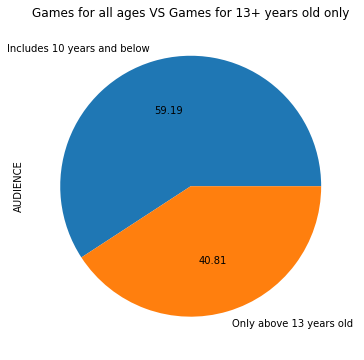

In [57]:
# Creating a function that aggregates the rating into two categories (for older people and suitable for kids)
def notForChildren(rating_str):
    '''Using the categorizes from the ESRB_RATING column, I am creating a binary categorial column that splits the games 
    created into games that are either suitable or not suitable for kids
    
    rating_str: is a string of the ratings from the ESRB_RATING column, depending on the String the function 
    will create the binary categories, I used if and else and iterated over the ESRB_RATING column
    
    returned values: it will categorize to two categories a String of "Only above 13 years old" or a 
    String of "Includes 10 years and below" we can also use int or boolean for this purpose but I kept it String to keep it
    more descriptive.
    
    '''
    
    if rating_str in ("AO", "T","M"):
        return "Only above 13 years old"
    elif rating_str in ("E","EC","KA","E10"):
        return "Includes 10 years and below"
    else:
        return 0

df_main['AUDIENCE'] = df_main["ESRB_RATING"].apply(notForChildren)
df3 = df_main
df3.drop(df3.index[df['AUDIENCE'] == 0], inplace = True)
def autopct(pct):
    return ('%.2f' % pct) if pct > 10 else ''
df3['AUDIENCE'].value_counts().plot(kind='pie', figsize=(18,6), autopct=autopct, title="Games for all ages VS Games for 13+ years old only")

As the pie chart suggests, we can confirm that the video game industry has a big focus on developing video games that are kids friendly, specifically for under 13 years old.

Text(0.5, 1.0, 'Video games produced by ESRP Rating')

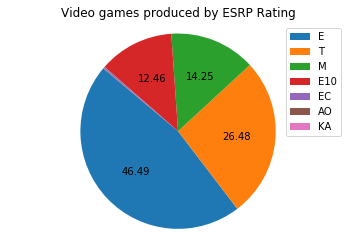

In [58]:
#Based on the ESRB, let us check the target audience of the video games produced
gamesByRating = df3['ESRB_RATING'].value_counts()
labels = gamesByRating.index.tolist()
values = gamesByRating.tolist()

plt.pie(values,autopct=autopct, startangle=140)
plt.legend(labels, loc="best")
plt.axis('equal')
plt.title('Video games produced by ESRP Rating')

It seems that the majority of video games produced targets all ages which means that kids have access to these games

There are 20 different genres


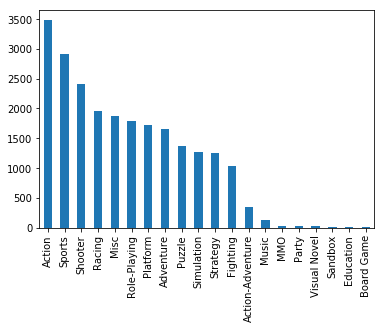

In [59]:
# Let us explore how many unique genres identified in this dataset
print("There are " + str(df_main['GENRE'].nunique()) +  " different genres") 
# What are the diffirent genres that companies usually produced in general
df_main['GENRE'].value_counts().plot(kind='bar');

**Misc** seems to score heighest in terms of numbers of games of this genre. However the data also indicates that **Action** games are very popular overall.

Text(0, 0.5, 'Number of Video Games Produced')

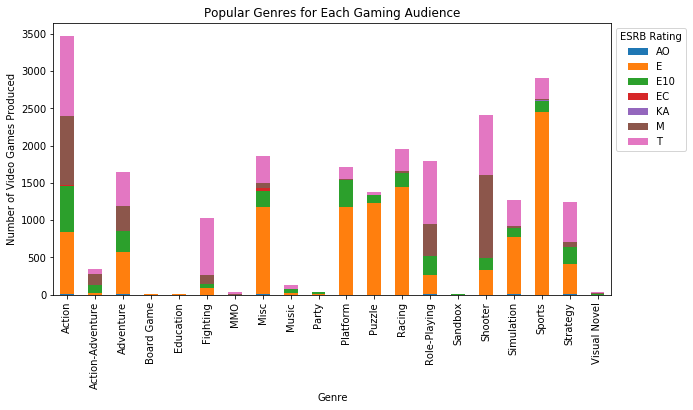

In [60]:
# We want to explore the number of video games produced for each genre and for each rating, so we will group the genres and rating and get the number of values from there
df2 = df_main.groupby(['GENRE', 'ESRB_RATING'])['GENRE'].count().unstack('ESRB_RATING').fillna(0)
df2.plot(title="Popular Genres for Each Gaming Audience", kind='bar', stacked=True, figsize=(10,5)).legend(title="ESRB Rating", bbox_to_anchor=(1, 1))
plt.xlabel('Genre')
plt.ylabel('Number of Video Games Produced')

### To Answer Question #1
The data shows that the video game industry is trying to provide accessible games for kids that focus on genres such as **Sports**, **Racing**, and **Puzzle** games.
It also shows that games with **Action** , **Shooting** and **Fighting** genres are usually developed for the older audience.

So the data show that companies do show some effort in considering some suitable genres for kids instead of focusing on the genres that promote violence. However, has it always been this way? Let us explore the historical emergence of these genres in the past years.

## Question #2: What are some of the emerging video game genres?

In [61]:
# Creating a datafrane that groups the genres by year
df4 = df_main.groupby(['YEAR', 'GENRE'])['YEAR'].count().unstack('GENRE').fillna(0)

Text(0, 0.5, 'Number of published games by genre')

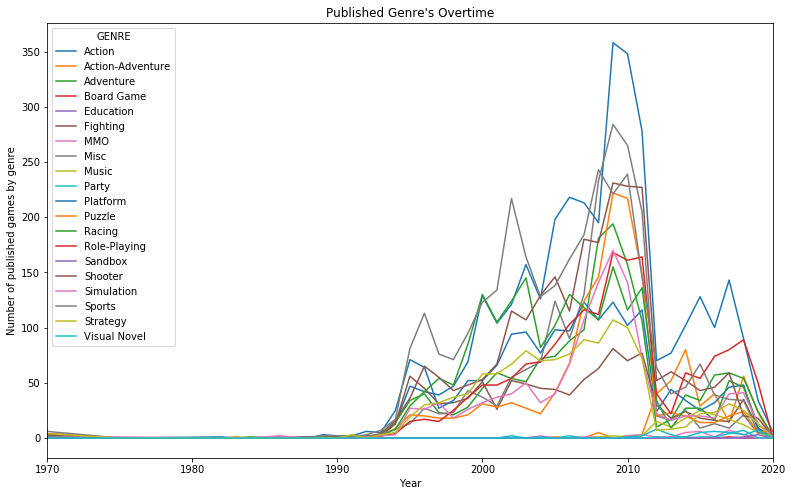

In [62]:
df4.plot(title="Published Genre's Overtime",figsize=(13,8))
plt.xlabel('Year')
plt.ylabel('Number of published games by genre')

### To Answer Question #2

There are two take aways from this output:
- It seems that the video game industry had an exponential increase in production from the year 1990 to 2010.

- The graph shows a rapid increase in production for the **Action** genre over the years, reaching a peak of around 300+ action games produced per year from 2000 to 2010

- The graph also shows that action games are still popular in the past decade to 2019.

Indeed video game industry, in general, produces a lot of action games. The graph also shows that even **Shooter** games are gaining popularity over the other genres.

However, in the previous section, we did confirm that companies tend to develop these popular genres for the more adult audience. Maybe it would help if we could identify some companies that usually focus on more kids-friendly genres? In the next section, let us explore if some companies achieve that focus.

## Question #3: Do diffirent companies produce games for diffirent target audeicnes?

Let us filter the publishers and see if there some companies that focus on creating kids friendly games. We will filter the publishers that have at least **70%** of their published games for the younger audience.

In [63]:
#Creating two dataframe, one has games only for older people and the other one is suitable for kids
younger = df_main[df["AUDIENCE"] == "Includes 10 years and below"]
older = df_main[df["AUDIENCE"] != "Includes 10 years and below"]

In [64]:
# We want to identify the publishers that create games for these categories and count the number of games they produce for each
df_y = younger["PUBLISHER"].value_counts().to_frame()
df_o = older["PUBLISHER"].value_counts().to_frame()

In [65]:
# Renaming the columns in the newly created frames then merging both into one frame to prepare the data for plotting
df_y.rename(columns={"PUBLISHER":"Games for kids"}, inplace=True)
df_o.rename(columns={"PUBLISHER":"Games for adults"}, inplace=True)
df_publishers = pd.merge(df_y, df_o, left_index=True, right_index=True)

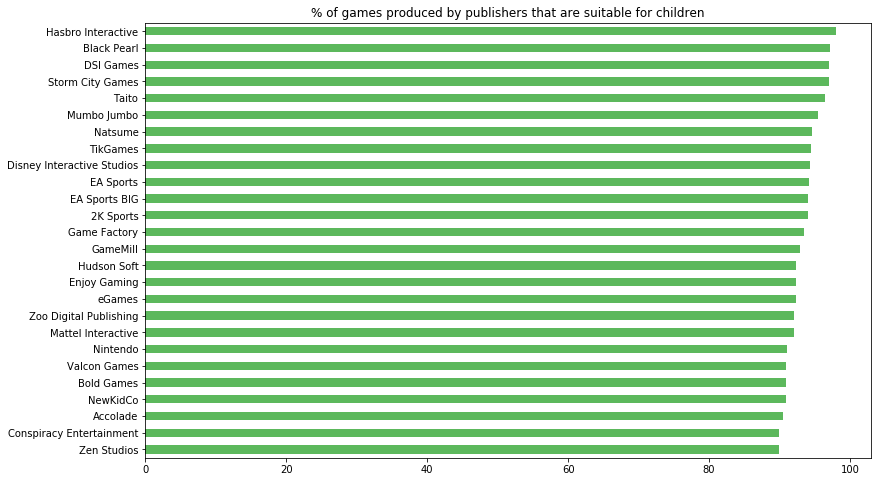

In [66]:
df_publishers["All Games"] = (df_publishers["Games for kids"] + df_publishers["Games for adults"])
df_publishers["Games for kids %"] = ((df_publishers["Games for kids"] / df_publishers["All Games"])*100)
df_publishers.sort_values(by="Games for kids %", ascending=True, inplace=True)
df4 = df_publishers[df_publishers["Games for kids %"] >= 90]
df4.filter(items=["Games for kids %"]).plot(kind="barh", title="% of games produced by publishers that are suitable for children", figsize=(13,8), color=['#5cb85c'],legend=False)

### To Answer Question #3

The graph shows a number of companies that produce **90%** games that are most likely suitable for kids based on the ESRB rating.

It is safe to assume that if we purchase games from companies such as **Nintendo** , **EA Sports** or **Disney Interactive Studios** then it is more likely that the games are suitable for children based on the data in the graph above.